### Visualize training data using t-SNE

In [5]:
%load_ext autoreload
%autoreload 2
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_path = '../data/train.csv'
data_all = pd.read_csv(data_path).drop(columns=['id', 'date', 'user_id'])
data_all.dropna(inplace=True)
data_all.replace('Male', 1., inplace=True)
data_all.replace('Female', 0., inplace=True)
data_ = data_all.values
X, y = data_[..., :-1], data_[..., -1]

##### Tuning hyperparameters in t-sne
- perplexity: usually between 5 and 50
- learning_rate: default being 10
- notice the size of cluster, distance between cluster doesn't matter (at most times)

In [22]:
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X[:2000]) # plot the first set of 2000 points
x_min, x_max = X_tsne.min(axis=0), X_tsne.max(axis=0)
X_norm = (X_tsne - x_min) / (x_max - x_min) # equivalent to using MinMaxScaler

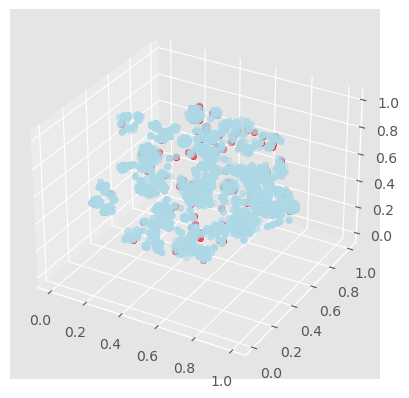

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_norm[..., 0], X_norm[..., 1], X_norm[..., 2], color='lightblue')
for i in range(len(X_norm)):
    if 1 == y[i]:
        ax.scatter(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], color='r')
plt.savefig('3d_visualization_with_tsne.png', dpi=200)

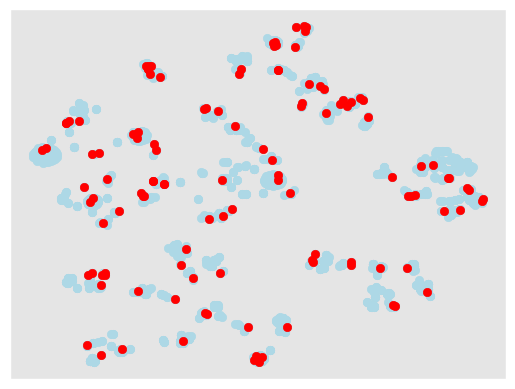

In [31]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c='lightblue')
for i in range(len(X_norm)):
    if 1 == y[i]:
        # is click
        plt.scatter(X_norm[i, 0], X_norm[i, 1], c='r')
plt.xticks([])
plt.yticks([])
plt.savefig('2d_visualization_with_tsne.png', dpi=200)

In [24]:
from sklearn.datasets import make_blobs
raw_data = make_blobs(n_samples=100, n_features=3, centers=2, cluster_std=1.8)

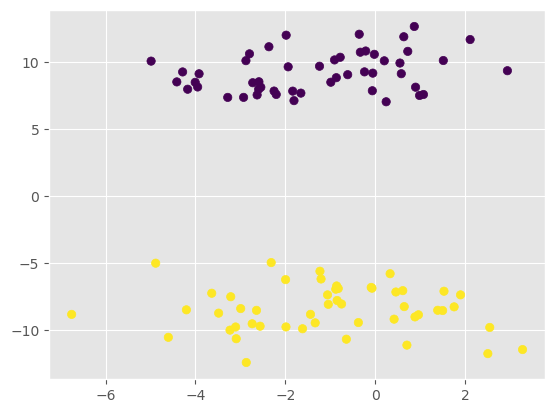

In [40]:
plt.scatter(raw_data[0][:, 0], raw_data[0][:, 1], c=raw_data[1])
plt.savefig('../images/original_make_blobs_data.png', dpi=200)

In [33]:
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=501)
X_tsne = tsne.fit_transform(raw_data[0])
x_min, x_max = X_tsne.min(axis=0), X_tsne.max(axis=0)
X_norm = (X_tsne - x_min) / (x_max - x_min) # equivalent to using MinMaxScaler

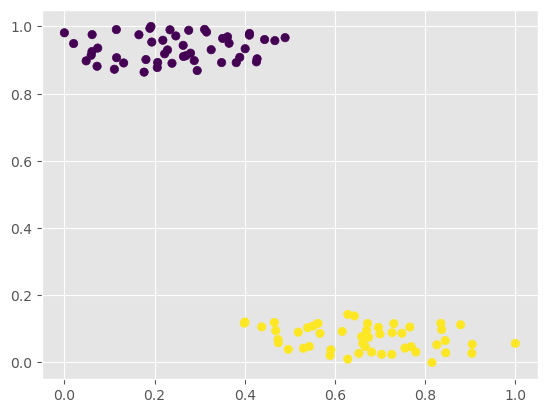

In [41]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=raw_data[1])
plt.savefig('../images/make_blobs_after_tsne.png', dpi=200)

In [1]:
loss = [.7303, .5485, .5131, .4972, .4886, .4837,
        .4802, .4778, .4757, .4743, .4731, .4724, 
        .4714, .4708]
auc = [.6980, .7947, .8181, .8269, .8310, .8329, 
        .8345, .8355, .8366, .8371, .8377, .8378,
        .8384, .8386]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
loss = np.array(loss)
auc = np.array(auc)

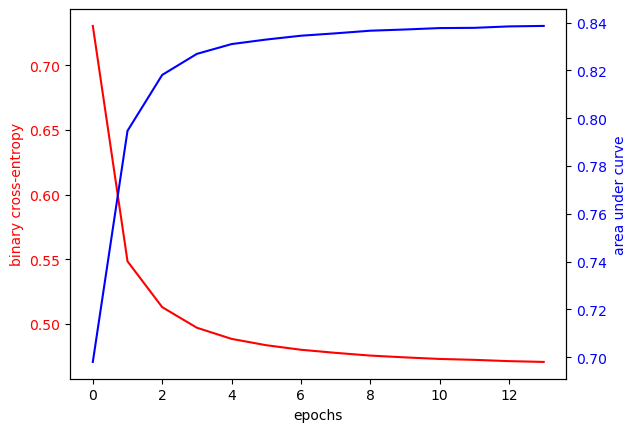

In [11]:
fig, ax = plt.subplots()
ax.plot(loss, color='r')
ax.set_ylabel('binary cross-entropy', color='r')
ax.set_xlabel('epochs')
ax.tick_params(axis='y', labelcolor='r')
ax2 = ax.twinx()
ax2.plot(auc, color='b', label='area under ROC')
ax2.set_ylabel('area under curve', color='b')
ax2.tick_params(axis='y', labelcolor='b')
plt.savefig('../images/auc_loss.png', dpi=200)